In [193]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('python-sklearn-assignment')
jovian.set_colab_id('1BGNAzGV30HjqnMN8wAup514461k5GoP7')

# House Price Prediction with Linear Regression

![](https://i.imgur.com/3sw1fY9.jpg)

In this assignment, you're going to predict the price of a house using information like its location, area, no. of rooms etc. You'll use the dataset from the [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) competition on [Kaggle](https://kaggle.com). We'll follow a step-by-step process to train our model:

1. Download and explore the data
2. Prepare the dataset for training
3. Train a linear regression model
4. Make predictions and evaluate the model

As you go through this notebook, you will find a **???** in certain places. Your job is to replace the **???** with appropriate code or values, to ensure that the notebook runs properly end-to-end and your machine learning model is trained properly without errors. 

**Guidelines**

1. Make sure to run all the code cells in order. Otherwise, you may get errors like `NameError` for undefined variables.
2. Do not change variable names, delete cells, or disturb other existing code. It may cause problems during evaluation.
3. In some cases, you may need to add some code cells or new statements before or after the line of code containing the **???**. 
4. Since you'll be using a temporary online service for code execution, save your work by running `jovian.commit` at regular intervals.
5. Review the "Evaluation Criteria" for the assignment carefully and make sure your submission meets all the criteria.
6. Questions marked **(Optional)** will not be considered for evaluation and can be skipped. They are for your learning.
7. It's okay to ask for help & discuss ideas on the [community forum](https://jovian.ai/forum/c/zero-to-gbms/gbms-assignment-1/100), but please don't post full working code, to give everyone an opportunity to solve the assignment on their own.


**Important Links**:

- Make a submission here: https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/assignment/assignment-1-train-your-first-ml-model
- Ask questions, discuss ideas and get help here: https://jovian.ai/forum/c/zero-to-gbms/gbms-assignment-1/100
- Review the following notebooks:
    - https://jovian.ai/aakashns/python-sklearn-linear-regression
    - https://jovian.ai/aakashns/python-sklearn-logistic-regression





## How to Run the Code and Save Your Work


**Option 1: Running using free online resources (1-click, recommended):** The easiest way to start executing the code is to click the **Run** button at the top of this page and select **Run on Binder**. This will set up a cloud-based Jupyter notebook server and allow you to modify/execute the code.


**Option 2: Running on your computer locally:** To run the code on your computer locally, you'll need to set up [Python](https://www.python.org), download the notebook and install the required libraries. Click the **Run** button at the top of this page, select the **Run Locally** option, and follow the instructions.

**Saving your work**: You can save a snapshot of the assignment to your [Jovian](https://jovian.ai) profile, so that you can access it later and continue your work. Keep saving your work by running `jovian.commit` from time to time.

In [1]:
!pip install jovian scikit-learn --upgrade --quiet

     |████████████████████████████████| 68 kB 6.7 MB/s 
     |████████████████████████████████| 23.1 MB 1.8 MB/s 


In [2]:
import jovian

In [3]:
jovian.commit(project='python-sklearn-assignment', privacy='secret')

[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab


Let's begin by installing the required libraries:

In [4]:
!pip install numpy pandas matplotlib seaborn plotly opendatasets jovian --quiet

## Step 1 - Download and Explore the Data

The dataset is available as a ZIP file at the following url:

In [5]:
dataset_url = 'https://github.com/JovianML/opendatasets/raw/master/data/house-prices-advanced-regression-techniques.zip'

We'll use the `urlretrieve` function from the module [`urllib.request`](https://docs.python.org/3/library/urllib.request.html) to dowload the dataset.

In [6]:
from urllib.request import urlretrieve

In [7]:
urlretrieve(dataset_url, 'house-prices.zip')

('house-prices.zip', <http.client.HTTPMessage at 0x7f2c9e323c50>)

The file `housing-prices.zip` has been downloaded. Let's unzip it using the [`zipfile`](https://docs.python.org/3/library/zipfile.html) module.

In [8]:
from zipfile import ZipFile

In [9]:
with ZipFile('house-prices.zip') as f:
    f.extractall(path='house-prices')

The dataset is extracted to the folder `house-prices`. Let's view the contents of the folder using the [`os`](https://docs.python.org/3/library/os.html) module.

In [10]:
import os

In [11]:
data_dir = 'house-prices'

In [12]:
os.listdir(data_dir)

['test.csv', 'data_description.txt', 'sample_submission.csv', 'train.csv']

Use the "File" > "Open" menu option to browse the contents of each file. You can also check out the [dataset description](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) on Kaggle to learn more.

We'll use the data in the file `train.csv` for training our model. We can load the for processing using the [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html) library.

In [13]:
import pandas as pd
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

In [14]:
train_csv_path = data_dir + '/train.csv'
train_csv_path

'house-prices/train.csv'

> **QUESTION 1**: Load the data from the file `train.csv` into a Pandas data frame.

In [15]:
prices_df = pd.read_csv(train_csv_path)

In [16]:
prices_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Let's explore the columns and data types within the dataset.

In [17]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

> **QUESTION 2**: How many rows and columns does the dataset contain? 

In [18]:
n_rows = 1460

In [19]:
n_cols = 81

In [20]:
print('The dataset contains {} rows and {} columns.'.format(n_rows, n_cols))

The dataset contains 1460 rows and 81 columns.


> **(OPTIONAL) QUESTION**: Before training the model, you may want to explore and visualize data from the various columns within the dataset, and study their relationship with the price of the house (using scatter plot and correlations). Create some graphs and summarize your insights using the empty cells below.

In [21]:
# instaling and importing some ploting libriaries 
!pip install plotly matplotlib seaborn --quiet
import plotly.express as px
import matplotlib 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000' 

Checking Distrbutions of some columns and their realtion with sale price 

In [22]:
px.scatter(prices_df, x='LotFrontage', y='SalePrice', title = 'Realtionship between lot frontage and sale price', color='LotShape')

In [23]:
# sale price distrbution according to MS zone
px.histogram(prices_df, x='SalePrice', title='price VS Zone', color='MSZoning')


we can see from the chart above the following: 
1- the most dominant zone is resdient low density "blue color" and it has wide range of prices.
2- the most expnsive zone is also the low resdient one and the most cheapear is the commerical zone.
3- floating viallge zone is really intersting as it sell on price above 120k.
4- the data looked skeweed to lift which mean its not normaly distrbuted .

Let's save our work before continuing.

In [24]:
import jovian

In [25]:
jovian.commit()

[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab


## Step 2 - Prepare the Dataset for Training

Before we can train the model, we need to prepare the dataset. Here are the steps we'll follow:

1. Identify the input and target column(s) for training the model.
2. Identify numeric and categorical input columns.
3. [Impute](https://scikit-learn.org/stable/modules/impute.html) (fill) missing values in numeric columns
4. [Scale](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range) values in numeric columns to a $(0,1)$ range.
5. [Encode](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) categorical data into one-hot vectors.
6. Split the dataset into training and validation sets.


### Identify Inputs and Targets

While the dataset contains 81 columns, not all of them are useful for modeling. Note the following:

- The first column `Id` is a unique ID for each house and isn't useful for training the model.
- The last column `SalePrice` contains the value we need to predict i.e. it's the target column.
- Data from all the other columns (except the first and the last column) can be used as inputs to the model.
 

In [26]:
prices_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

> **QUESTION 3**: Create a list `input_cols` of column names containing data that can be used as input to train the model, and identify the target column as the variable `target_col`.

Checking the number of missing values in columns if it exceed 30% 

In [39]:
# i will define a function to help us calculating the missing values in the columns that we believe it contain many missing values
def calculate_nan(dfColumn):
  nan= dfColumn.isna().sum()
  print('precntage of missing values : {:.2f}% '.format((nan/1460) *100 ))
  

In [46]:
calculate_nan(prices_df['Alley'])

precntage of missing values : 93.77% 


In [41]:
calculate_nan(prices_df['FireplaceQu'])

precntage of missing values : 47.26% 


In [42]:
calculate_nan(prices_df['PoolQC'])

precntage of missing values : 99.52% 


In [43]:
calculate_nan(prices_df['Fence'])


precntage of missing values : 80.75% 


In [44]:
calculate_nan(prices_df['MiscFeature'])

precntage of missing values : 96.30% 


In [48]:
calculate_nan(prices_df['LotFrontage'])

precntage of missing values : 17.74% 


The columns that will be droped are the following 

In [47]:
prices_df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [49]:
# i will drop some columns which contain to many missing value as filling it with mean for numeric or frequent for categorical data will not be an appropiate 
drop_column= ['PoolQC','Fence','MiscFeature','FireplaceQu','Alley']
prices_df.drop(drop_column, axis=1, inplace=True)

In [58]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [59]:
# seprating the dataset into train , val and test 
from sklearn.model_selection import train_test_split
train_val_df, test_df=train_test_split(prices_df, test_size=0.2, random_state=42)
train_df, val_df=train_test_split(train_val_df, test_size=0.25, random_state=42)

In [60]:
print('train shape:', train_df.shape)
print('val shape:',val_df.shape)
print('test shape:', test_df.shape)

train shape: (876, 76)
val shape: (292, 76)
test shape: (292, 76)


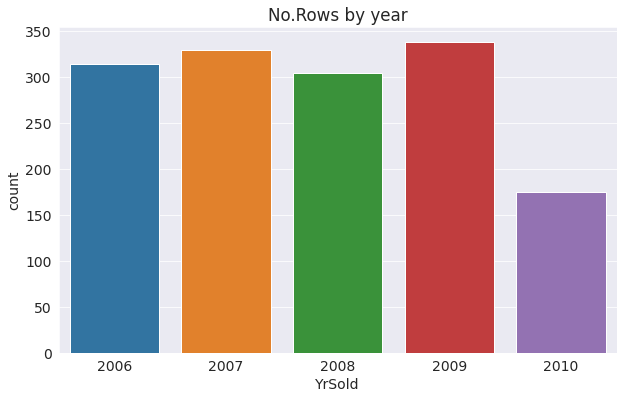

In [61]:
# its better to seprate the train, val and test according to year the property sold , where the test set will have the latest  year and the valdition set will take the year before while train set will have the rest 
plt.title('No.Rows by year')
sns.countplot(x=prices_df.YrSold);

In [62]:
train_df=prices_df[prices_df.YrSold < 2009]
val_df=prices_df[prices_df.YrSold == 2009]
test_df=prices_df[prices_df.YrSold > 2009]
print('train shape:', train_df.shape)
print('val shape:',val_df.shape)
print('test shape:', test_df.shape)



train shape: (947, 76)
val shape: (338, 76)
test shape: (175, 76)


In [63]:
# lets save our work 
jovian.commit()

[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab


In [64]:
# Identify the input columns (a list of column names)
input_cols = list(train_df.columns)[1:-1]

In [65]:
# Identify the name of the target column (a single string, not a list)
target_col = 'SalePrice'

In [66]:
print(list(input_cols))

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleTy

In [67]:
len(input_cols)

74

In [68]:
print(target_col)

SalePrice


Make sure that the `Id` and `SalePrice` columns are not included in `input_cols`.

Now that we've identified the input and target columns, we can separate input & target data.

In [69]:
# train 
train_input = train_df[input_cols].copy()
train_target= train_df[target_col].copy()
#val
val_input = val_df[input_cols].copy()
val_target= val_df[target_col].copy()
#test
test_input = test_df[input_cols].copy()
test_target= test_df[target_col].copy()

In [70]:
train_input

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,180,RM,21.0,1533,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,5,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,553,Unf,0,77,630,GasA,Ex,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,Ex,3,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,8,2006,WD,Abnorml
1452,180,RM,35.0,3675,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,80.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547,Unf,0,0,547,GasA,Gd,Y,SBrkr,1072,0,0,1072,1,0,1,0,2,1,TA,5,Typ,0,Basment,2005.0,Fin,2,525,TA,TA,Y,0,28,0,0,0,0,0,5,2006,WD,Normal
1453,20,RL,90.0,17217,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1140,1140,GasA,Ex,Y,SBrkr,1140,0,0,1140,0,0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,Y,36,56,0,0,0,0,0,7,2006,WD,Abnorml
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal


In [71]:
train_target

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1449     92000
1452    145000
1453     84500
1455    175000
1459    147500
Name: SalePrice, Length: 947, dtype: int64

Let's save our work before continuing.

In [72]:
jovian.commit()

[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab


### Identify Numeric and Categorical Data

The next step in data preparation is to identify numeric and categorical columns. We can do this by looking at the data type of each column.

In [73]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

> **QUESTION 4**: Crate two lists `numeric_cols` and `categorical_cols` containing names of numeric and categorical input columns within the dataframe respectively. Numeric columns have data types `int64` and `float64`, whereas categorical columns have the data type `object`.
>
> *Hint*: See this [StackOverflow question](https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas). 

In [74]:
import numpy as np

In [75]:
numric_cols = train_input.select_dtypes(include=['int64', 'float64']).columns.tolist()
train_input[numric_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     947 non-null    int64  
 1   LotFrontage    785 non-null    float64
 2   LotArea        947 non-null    int64  
 3   OverallQual    947 non-null    int64  
 4   OverallCond    947 non-null    int64  
 5   YearBuilt      947 non-null    int64  
 6   YearRemodAdd   947 non-null    int64  
 7   MasVnrArea     941 non-null    float64
 8   BsmtFinSF1     947 non-null    int64  
 9   BsmtFinSF2     947 non-null    int64  
 10  BsmtUnfSF      947 non-null    int64  
 11  TotalBsmtSF    947 non-null    int64  
 12  1stFlrSF       947 non-null    int64  
 13  2ndFlrSF       947 non-null    int64  
 14  LowQualFinSF   947 non-null    int64  
 15  GrLivArea      947 non-null    int64  
 16  BsmtFullBath   947 non-null    int64  
 17  BsmtHalfBath   947 non-null    int64  
 18  FullBath 

In [76]:
val_input[numric_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 5 to 1454
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     338 non-null    int64  
 1   LotFrontage    273 non-null    float64
 2   LotArea        338 non-null    int64  
 3   OverallQual    338 non-null    int64  
 4   OverallCond    338 non-null    int64  
 5   YearBuilt      338 non-null    int64  
 6   YearRemodAdd   338 non-null    int64  
 7   MasVnrArea     337 non-null    float64
 8   BsmtFinSF1     338 non-null    int64  
 9   BsmtFinSF2     338 non-null    int64  
 10  BsmtUnfSF      338 non-null    int64  
 11  TotalBsmtSF    338 non-null    int64  
 12  1stFlrSF       338 non-null    int64  
 13  2ndFlrSF       338 non-null    int64  
 14  LowQualFinSF   338 non-null    int64  
 15  GrLivArea      338 non-null    int64  
 16  BsmtFullBath   338 non-null    int64  
 17  BsmtHalfBath   338 non-null    int64  
 18  FullBath 

In [77]:
categorical_cols = train_input.select_dtypes(include='object').columns.tolist()

In [78]:
print(list(numric_cols))

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [79]:
print(list(categorical_cols))

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


Let's save our work before continuing.

In [80]:
jovian.commit()

[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab


In [81]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Impute Numerical Data

Some of the numeric columns in our dataset contain missing values (`nan`).

In [82]:
missing_counts = prices_df[numric_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

Machine learning models can't work with missing data. The process of filling missing values is called [imputation](https://scikit-learn.org/stable/modules/impute.html).

<img src="https://i.imgur.com/W7cfyOp.png" width="480">

There are several techniques for imputation, but we'll use the most basic one: replacing missing values with the average value in the column using the `SimpleImputer` class from `sklearn.impute`.


In [83]:
from sklearn.impute import SimpleImputer

> **QUESTION 5**: Impute (fill) missing values in the numeric columns of `inputs_df` using a `SimpleImputer`. 
>
> *Hint*: See [this notebook](https://jovian.ai/aakashns/python-sklearn-logistic-regression/v/66#C88).

In [84]:
# 1. Create the imputer
imputer = SimpleImputer(strategy='mean')

In [85]:
# 2. Fit the imputer to the numeric colums
imputer.fit(prices_df[numric_cols])

SimpleImputer()

In [86]:
# 3. Transform and replace the numeric columns
train_input[numric_cols] = imputer.transform(train_input[numric_cols])
#valdition
val_input[numric_cols] = imputer.transform(val_input[numric_cols])
# test 
test_input[numric_cols] = imputer.transform(test_input[numric_cols])

After imputation, none of the numeric columns should contain any missing values.

In [87]:
missing_counts = train_input[numric_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0] # should be an empty list

Series([], dtype: int64)

Let's save our work before continuing.

In [88]:
jovian.commit()

[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab


### Scale Numerical Values

The numeric columns in our dataset have varying ranges. 

In [89]:
prices_df[numric_cols].describe().loc[['min', 'max']]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
min,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,0.0,0.0,0.0,334.0,0.0,0.0,334.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0
max,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,5644.0,1474.0,2336.0,6110.0,4692.0,2065.0,572.0,5642.0,3.0,2.0,3.0,2.0,8.0,3.0,14.0,3.0,2010.0,4.0,1418.0,857.0,547.0,552.0,508.0,480.0,738.0,15500.0,12.0,2010.0


A good practice is to [scale numeric features](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range) to a small range of values e.g. $(0,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.


> **QUESTION 6**: Scale numeric values to the $(0, 1)$ range using `MinMaxScaler` from `sklearn.preprocessing`.
>
> *Hint*: See [this notebook](https://jovian.ai/aakashns/python-sklearn-logistic-regression/v/66#C104).

In [90]:
from sklearn.preprocessing import MinMaxScaler

In [91]:
# Create the scaler
scaler = MinMaxScaler()

In [92]:
# Fit the scaler to the numeric columns
scaler.fit(prices_df[numric_cols])

MinMaxScaler()

In [93]:
# Transform and replace the numeric columns
train_input[numric_cols] = scaler.transform(train_input[numric_cols])
#valdition
val_input[numric_cols] = scaler.transform(val_input[numric_cols])
# test
test_input[numric_cols] = scaler.transform(test_input[numric_cols])

After scaling, the ranges of all numeric columns should be $(0, 1)$.

In [94]:
train_input[numric_cols].describe().loc[['min', 'max']]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
min,0.0,0.0,0.001089,0.0,0.125,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,0.763561,1.0,1.000,0.985507,0.966667,1.0,1.0,1.0,0.921661,1.0,1.0,1.0,1.0,1.0,0.666667,1.0,1.0,1.0,1.0,0.666667,1.0,1.0,0.981818,1.0,1.0,1.0,1.0,1.0,0.801181,1.0,1.0,1.0,1.0,0.5


Let's save our work before continuing.

In [95]:
jovian.commit()

[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab


### Encode Categorical Columns

Our dataset contains several categorical columns, each with a different number of categories.

In [96]:
prices_df[categorical_cols].nunique().sort_values(ascending=False)

Neighborhood     25
Exterior2nd      16
Exterior1st      15
SaleType          9
Condition1        9
RoofMatl          8
HouseStyle        8
Condition2        8
Functional        7
Foundation        6
RoofStyle         6
GarageType        6
Heating           6
BsmtFinType2      6
BsmtFinType1      6
SaleCondition     6
BldgType          5
LotConfig         5
ExterCond         5
MSZoning          5
GarageCond        5
HeatingQC         5
GarageQual        5
Electrical        5
ExterQual         4
LotShape          4
LandContour       4
BsmtQual          4
KitchenQual       4
BsmtExposure      4
BsmtCond          4
MasVnrType        4
LandSlope         3
PavedDrive        3
GarageFinish      3
CentralAir        2
Utilities         2
Street            2
dtype: int64



Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column.

> **QUESTION 7**: Encode categorical columns in the dataset as one-hot vectors using `OneHotEncoder` from `sklearn.preprocessing`. Add a new binary (0/1) column for each category
> 
> *Hint*: See [this notebook](https://jovian.ai/aakashns/python-sklearn-logistic-regression/v/66#C122).

In [97]:
from sklearn.preprocessing import OneHotEncoder

In [98]:
# 1. Create the encoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [99]:
# 2. Fit the encoder to the categorical colums
encoder.fit(prices_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [100]:
# 3. Generate column names for each category
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
len(encoded_cols)

245

In [101]:
# 4. Transform and add new one-hot category columns
train_input[encoded_cols] = encoder.transform(train_input[categorical_cols])
#valdition
val_input[encoded_cols] = encoder.transform(val_input[categorical_cols])
#test
test_input[encoded_cols] = encoder.transform(test_input[categorical_cols])

The new one-hot category columns should now be added to `inputs_df`.

In [102]:
train_input[encoded_cols]

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,...,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_nan,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_nan,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_nan,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_nan,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_nan,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_nan,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1

Let's save our work before continuing.

In [103]:
jovian.commit()

[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab


### Training and Validation Set

we have already made this step previously 

Let's save our work before continuing.

## Step 3 - Train a Linear Regression Model

We're now ready to train the model. Linear regression is a commonly used technique for solving [regression problems](https://jovian.ai/aakashns/python-sklearn-logistic-regression/v/66#C6). In a linear regression model, the target is modeled as a linear combination (or weighted sum) of input features. The predictions from the model are evaluated using a loss function like the Root Mean Squared Error (RMSE).


Here's a visual summary of how a linear regression model is structured:

<img src="https://i.imgur.com/iTM2s5k.png" width="480">

However, linear regression doesn't generalize very well when we have a large number of input columns with co-linearity i.e. when the values one column are highly correlated with values in other column(s). This is because it tries to fit the training data perfectly. 

Instead, we'll use Ridge Regression, a variant of linear regression that uses a technique called L2 regularization to introduce another loss term that forces the model to generalize better. Learn more about ridge regression here: https://www.youtube.com/watch?v=Q81RR3yKn30

> **QUESTION 8**: Create and train a linear regression model using the `Ridge` class from `sklearn.linear_model`.

In [151]:
from sklearn.linear_model import Ridge

In [152]:
# Create the model
model = Ridge()

In [153]:
# Fit the model using inputs and targets
model.fit(train_input[numric_cols+encoded_cols], train_target)

Ridge()

`model.fit` uses the following strategy for training the model (source):

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.

<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">

Let's save our work before continuing.

In [154]:
jovian.commit()

[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab


## Step 4 - Make Predictions and Evaluate Your Model

The model is now trained, and we can use it to generate predictions for the training and validation inputs. We can evaluate the model's performance using the RMSE (root mean squared error) loss function.

> **QUESTION 9**: Generate predictions and compute the RMSE loss for the training and validation sets. 
> 
> *Hint*: Use the `mean_squared_error` with the argument `squared=False` to compute RMSE loss.

In [155]:
X_train = train_input[numric_cols + encoded_cols]
X_val = val_input[numric_cols + encoded_cols]
X_test = test_input[numric_cols + encoded_cols]

In [213]:
from sklearn.metrics import mean_squared_error

In [157]:
train_preds = model.predict(X_train)

In [158]:
train_preds

array([205678.84317238, 195724.86263609, 210328.31701119, 166926.01939468,
       305867.46217872, 279497.81485406, 146030.22764364, 113761.50203084,
       129743.18390888, 381664.2633319 , 139638.72169906, 226808.62914325,
       153563.09908673, 154656.03273085, 104708.65068283, 150744.76843115,
       342295.73700731, 115305.24493844, 215037.57993998, 135400.43639209,
       204303.4085709 ,  61939.74406317,  54010.22192629, 139951.93853372,
       222410.63839108, 308488.95963825, 331275.89583678,  90693.96802565,
       154702.03562933, 171091.27387432, 137360.35490498, 146766.48045965,
       148021.22691251, 249865.12876381, 135751.11747835, 185214.66214431,
       126429.9689654 , 377819.33116694, 110344.99513074, 182966.28455042,
       182892.65895854, 454226.74661879, 119163.37051725, 161962.64854661,
        87170.56121018, 208197.17261345, 322960.52256141, 214362.2440008 ,
       234705.14376289, 271221.78762392, 113358.80531685, 121116.06066499,
       122158.32785345, 1

In [209]:
train_target


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1449     92000
1452    145000
1453     84500
1455    175000
1459    147500
Name: SalePrice, Length: 947, dtype: int64

In [214]:
train_rmse = mean_squared_error(train_target, train_preds, squared=False)

In [215]:
print('The RMSE loss for the training set is $ {}.'.format(train_rmse))

The RMSE loss for the training set is $ 22514.09065725514.


In [114]:
val_preds = model.predict(X_val)

In [115]:
val_preds

array([1.62744435e+05, 1.96912126e+05, 1.38876526e+05, 2.53809578e+05,
       1.54146978e+05, 1.54771754e+05, 2.54350545e+05, 9.02955907e+04,
       2.09031698e+05, 2.36676514e+05, 1.76126557e+05, 9.94761781e+04,
       1.08360169e+05, 1.94999679e+05, 1.66015659e+05, 1.90772921e+05,
       1.61573854e+05, 2.93982442e+02, 1.61558623e+05, 1.97483820e+05,
       1.10632592e+05, 1.10325021e+05, 1.74842059e+05, 2.03994817e+05,
       2.38624385e+05, 1.94466293e+05, 2.21747425e+05, 1.28076569e+05,
       1.99608546e+05, 4.25757190e+05, 1.77955861e+05, 1.45090233e+05,
       1.30420753e+05, 2.12379218e+05, 1.32173885e+05, 1.35863776e+05,
       3.50243368e+05, 1.29666467e+05, 1.87396548e+05, 2.45327782e+05,
       1.97465427e+05, 9.73073690e+04, 4.15272334e+05, 1.02029170e+05,
       1.95370799e+05, 3.60705775e+05, 1.00295162e+05, 2.23773397e+05,
       1.57558258e+05, 1.52270546e+05, 2.06242994e+05, 2.32376288e+05,
       2.20129714e+05, 1.31786017e+05, 1.86656116e+05, 1.70868791e+05,
      

In [216]:
val_rmse = mean_squared_error(val_target, val_preds, squared=False)

In [217]:
print('The RMSE loss for the validation set is $ {}.'.format(val_rmse))

The RMSE loss for the validation set is $ 28596.901756128766.


In [218]:
test_preds = model.predict(X_test)
test_rmse = mean_squared_error(test_target, test_preds, squared=False)
print('The RMSE loss for the test set is $ {}.'.format(test_rmse))


The RMSE loss for the test set is $ 26932.969188386814.


In [219]:
from sklearn.metrics import r2_score

In [221]:
def Accuarcy(targets, preds, name =' '):
  accuarcy=r2_score(targets, preds)
  print(name+'Accuarcy: {:.2f}%'.format(accuarcy*100))



**Now Lets Calcualte our Model Accuarcy **

Train set Model Accuarcy 

In [224]:
Accuarcy(train_target, train_preds, name= 'Train Model')

Train ModelAccuarcy: 91.83%


Valdition set Model Accuarcy

In [225]:
Accuarcy(val_target, val_preds, name ='Valdition Model')

Valdition ModelAccuarcy: 87.46%


Test set Model Accuarcy 

In [226]:
Accuarcy(test_target, test_preds, name= 'Test Model')

Test ModelAccuarcy: 88.73%


In [187]:
prices_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [186]:
test_target.head()

16    149000
24    154000
26    134800
27    306000
33    165500
Name: SalePrice, dtype: int64

### Feature Importance

Let's look at the weights assigned to different columns, to figure out which columns in the dataset are the most important.

> **QUESTION 10**: Identify the weights (or coefficients) assigned to for different features by the model.
> 
> *Hint:* Read [the docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [199]:
train_input[numric_cols+encoded_cols].shape

(947, 281)

In [196]:
model.coef_.shape

(281,)

In [203]:
weights = np.append(model.coef_, model.intercept_)

In [204]:
weights.shape

(282,)

In [201]:
np.append(numric_cols+encoded_cols,1).shape

(282,)

Let's create a dataframe to view the weight assigned to each column.

In [205]:
weights_df = pd.DataFrame({
    'columns': np.append(numric_cols+encoded_cols,1),
    'weight': weights
}).sort_values('weight', ascending=False)

In [206]:
weights_df

,columns,weight
129,RoofMatl_WdShngl,97049.710026
15,GrLivArea,87212.834529
13,2ndFlrSF,82653.636776
3,OverallQual,71934.367933
12,1stFlrSF,67412.040919
...,...,...
137,Exterior1st_ImStucc,-24902.000993
36,MSZoning_C (all),-25263.539087
281,1,-37462.928936
99,Condition2_PosN,-85164.470124


Can you tell which columns have the greatest impact on the price of the house?

### Making Predictions

The model can be used to make predictions on new inputs using the following helper function:

In [171]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numric_cols] = imputer.transform(input_df[numric_cols])
    input_df[numric_cols] = scaler.transform(input_df[numric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols].values)
    X_input = input_df[numric_cols + encoded_cols]
    return model.predict(X_input)[0]

In [188]:
sample_input = { 'MSSubClass': 60	, 'MSZoning': 'RL', 'LotFrontage': 65.0, 'LotArea': 8450,
 'Street': 'Pave', 'Alley': None, 'LotShape': 'Reg', 'LandContour': 'Lvl', 'Utilities': 'AllPub',
 'LotConfig': 'Inside', 'LandSlope': 'Gtl', 'Neighborhood': 'NAmes', 'Condition1': 'Norm', 'Condition2': 'Norm',
 'BldgType': '1Fam', 'HouseStyle': '1Story', 'OverallQual': 4, 'OverallCond': 5, 'YearBuilt': 1959,
 'YearRemodAdd': 1959, 'RoofStyle': 'Gable', 'RoofMatl': 'CompShg', 'Exterior1st': 'Plywood',
 'Exterior2nd': 'Plywood', 'MasVnrType': 'None','MasVnrArea': 0.0,'ExterQual': 'TA','ExterCond': 'TA',
 'Foundation': 'CBlock','BsmtQual': 'TA','BsmtCond': 'TA','BsmtExposure': 'No','BsmtFinType1': 'ALQ',
 'BsmtFinSF1': 569,'BsmtFinType2': 'Unf','BsmtFinSF2': 0,'BsmtUnfSF': 381,
 'TotalBsmtSF': 950,'Heating': 'GasA','HeatingQC': 'Fa','CentralAir': 'Y','Electrical': 'SBrkr', '1stFlrSF': 1225,
 '2ndFlrSF': 0, 'LowQualFinSF': 0, 'GrLivArea': 1225, 'BsmtFullBath': 1, 'BsmtHalfBath': 0, 'FullBath': 1,
 'HalfBath': 1, 'BedroomAbvGr': 3, 'KitchenAbvGr': 1,'KitchenQual': 'TA','TotRmsAbvGrd': 6,'Functional': 'Typ',
 'Fireplaces': 0,'FireplaceQu': np.nan,'GarageType': np.nan,'GarageYrBlt': np.nan,'GarageFinish': np.nan,'GarageCars': 0,
 'GarageArea': 0,'GarageQual': np.nan,'GarageCond': np.nan,'PavedDrive': 'Y', 'WoodDeckSF': 352, 'OpenPorchSF': 0,
 'EnclosedPorch': 0,'3SsnPorch': 0, 'ScreenPorch': 0, 'PoolArea': 0, 'PoolQC': np.nan, 'Fence': np.nan, 'MiscFeature': 'Shed',
 'MiscVal': 400, 'MoSold': 2, 'YrSold': 2010, 'SaleType': 'WD', 'SaleCondition': 'Normal'}

In [189]:
predicted_price = predict_input(sample_input)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:442: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



In [190]:
print('The predicted sale price of the house is ${}'.format(predicted_price))

The predicted sale price of the house is $128623.87484775839


Change the values in `sample_input` above and observe the effects on the predicted price. 

### Saving the model

Let's save the model (along with other useful objects) to disk, so that we use it for making predictions without retraining.

In [177]:
import joblib

In [175]:
house_price_predictor = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [178]:
joblib.dump(house_price_predictor, 'house_price_predictor.joblib')

['house_price_predictor.joblib']

Congratulations on training and evaluating your first machine learning model using `scikit-learn`! Let's save our work before continuing. We'll include the saved model as an output.

In [228]:
jovian.commit(outputs=['house_price_predictor.joblib'])

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Uploading additional outputs...
Committed successfully! https://jovian.ai/evilmhany/python-sklearn-assignment


'https://jovian.ai/evilmhany/python-sklearn-assignment'

In [229]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/evilmhany/python-sklearn-assignment


'https://jovian.ai/evilmhany/python-sklearn-assignment'

## Make Submission

To make a submission, just execute the following cell:

In [227]:
jovian.submit('zerotogbms-a1')

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/evilmhany/python-sklearn-assignment
[jovian] Submitting assignment..
[jovian] Verify your submission at https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/assignment/assignment-1-train-your-first-ml-model


In [192]:
jovian.submit(assignment="zerotogbms-a1")

[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab


You can also submit your Jovian notebook link on the assignment page: https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/assignment/assignment-1-train-your-first-ml-model

Make sure to review the evaluation criteria carefully. You can make any number of submissions, and only your final submission will be evalauted.

Ask questions, discuss ideas and get help here: https://jovian.ai/forum/c/zero-to-gbms/gbms-assignment-1/100
